In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2010-01-01'
end = '2024-10-31'

df = yf.download('AAPL', start, end)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2010-01-04 00:00:00+00:00,6.447411,7.643214,7.660714,7.585000,7.622500,493729600
2010-01-05 00:00:00+00:00,6.458560,7.656429,7.699643,7.616071,7.664286,601904800
2010-01-06 00:00:00+00:00,6.355828,7.534643,7.686786,7.526786,7.656429,552160000
2010-01-07 00:00:00+00:00,6.344077,7.520714,7.571429,7.466071,7.562500,477131200
2010-01-08 00:00:00+00:00,6.386254,7.570714,7.571429,7.466429,7.510714,447610800


In [3]:
df.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2024-10-24 00:00:00+00:00,230.316620,230.570007,230.820007,228.410004,229.979996,31109500
2024-10-25 00:00:00+00:00,231.155685,231.410004,233.220001,229.570007,229.740005,38802300
2024-10-28 00:00:00+00:00,233.143494,233.399994,234.729996,232.550003,233.320007,36087100
2024-10-29 00:00:00+00:00,233.413193,233.669998,234.330002,232.320007,233.100006,35417200
2024-10-30 00:00:00+00:00,229.847122,230.100006,233.470001,229.550003,232.610001,47070900


In [4]:
df = df.reset_index()
df.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
0,2010-01-04 00:00:00+00:00,6.447411,7.643214,7.660714,7.585000,7.622500,493729600
1,2010-01-05 00:00:00+00:00,6.458560,7.656429,7.699643,7.616071,7.664286,601904800
2,2010-01-06 00:00:00+00:00,6.355828,7.534643,7.686786,7.526786,7.656429,552160000
3,2010-01-07 00:00:00+00:00,6.344077,7.520714,7.571429,7.466071,7.562500,477131200
4,2010-01-08 00:00:00+00:00,6.386254,7.570714,7.571429,7.466429,7.510714,447610800


In [5]:
df = df.drop(['Date', 'Adj Close'], axis=1)
df.head()

C:\Users\yrudi\AppData\Local\Temp\ipykernel_33144\4261181942.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date', 'Adj Close'], axis=1)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,7.643214,7.660714,7.585000,7.622500,493729600
1,7.656429,7.699643,7.616071,7.664286,601904800
2,7.534643,7.686786,7.526786,7.656429,552160000
3,7.520714,7.571429,7.466071,7.562500,477131200
4,7.570714,7.571429,7.466429,7.510714,447610800


<Axes: >

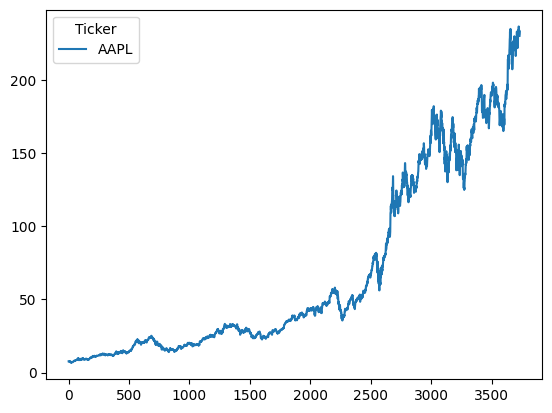

In [6]:
df.plot.line(y="Close", use_index=True)

In [7]:
ma100 = df.Close.rolling(100).mean()
ma200 = df.Close.rolling(200).mean()

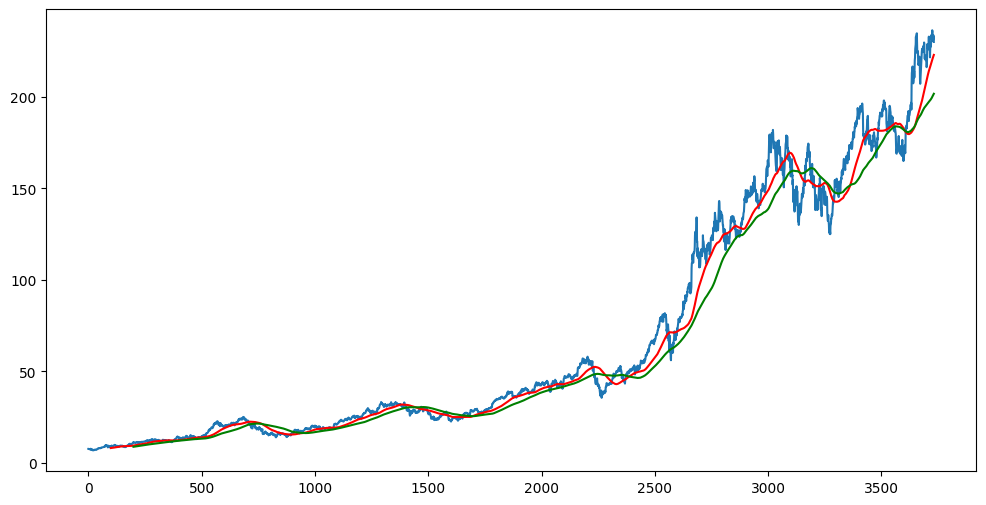

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [9]:
df.shape

(3732, 5)

In [10]:
training = pd.DataFrame(df['Close'][0:int(len(df) * 0.7)])
testing = pd.DataFrame(df['Close'][int(len(df) * 0.7):int(len(df))])

print(testing.shape)
print(training.shape)

(1120, 1)
(2612, 1)


In [11]:
training.head()

Ticker,AAPL
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

training_array = scaler.fit_transform(training)
training_array

array([[0.01046536],
       [0.01064169],
       [0.0090166 ],
       ...,
       [0.93498218],
       [0.95916785],
       [0.95309649]])

In [13]:
x_train = []
y_train = []

training_array.shape

(2612, 1)

In [14]:
for i in range(100, training_array.shape[0]):
    
    x_train.append(training_array[i - 100 : i])
    y_train.append(training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
    

In [15]:
import sys
print(sys.executable)

C:\Python38\python.exe


In [16]:
!pip show keras


Name: keras
Version: 2.13.1
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: c:\python38\lib\site-packages
Requires: 
Required-by: tensorflow-intel


In [17]:
!pip install keras

In [18]:
!pip install tensorflow

from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

# Initialize the model
model = Sequential()

In [19]:
x_train.shape

(2512, 100, 1)

In [20]:
model.add(LSTM(units=50, activation='relu', return_sequences=True,
               input_shape= (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))



model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units=80, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 80)                5

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
79/79 [==============================] - 59s 534ms/step - loss: 0.0292
Epoch 2/50
79/79 [==============================] - 44s 552ms/step - loss: 0.0069
Epoch 3/50
79/79 [==============================] - 36s 447ms/step - loss: 0.0048
Epoch 4/50
79/79 [==============================] - 62s 780ms/step - loss: 0.0055
Epoch 5/50
13/79 [===>..........................] - ETA: 46s - loss: 0.0040

In [ ]:
model.save('keras_model.h5')

In [ ]:
testing.head()

In [ ]:
past_100_days = training.tail(100)

In [ ]:
final_df = pd.concat([past_100_days, testing], ignore_index=True)


In [ ]:
final_df.head()

In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

In [ ]:
input_data.shape

In [ ]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i - 100 : i])
    y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

print(x_test.shape)
print(y_test.shape)

In [ ]:
y_predicted = model.predict(x_test)

In [ ]:
y_predicted.shape

In [ ]:
scaler.scale_

In [ ]:
scale_factor = 1 / 0.00554362

In [ ]:
y_predicted = y_predicted *  scale_factor
y_test = y_test * scale_factor

In [ ]:
fig2 = plt.figure(figsize= (12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')

plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()